In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Load and Inspect the Data

In [3]:
import pandas as pd


df = pd.read_csv("customer_data.csv")

# View basic info
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())


(100, 4)
Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
       Customer ID         Age  Annual Income  Spending Score
count   100.000000  100.000000      100.00000      100.000000
mean     50.500000   43.350000    91109.68000       47.710000
std      29.011492   14.904663    40795.52719       29.747182
min       1.000000   19.000000    17568.00000        1.000000
25%      25.750000   31.750000    54466.25000       21.000000
50%      50.500000   42.000000    97656.00000       41.500000
75%      75.250000   57.000000   127957.25000       72.250000
max     100.000000   69.000000   149633.00000       99.000000


Preprocess the Data

In [4]:
from sklearn.preprocessing import StandardScaler


features = df[['Age', 'Annual Income', 'Spending Score']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Determine Optimal Clusters 

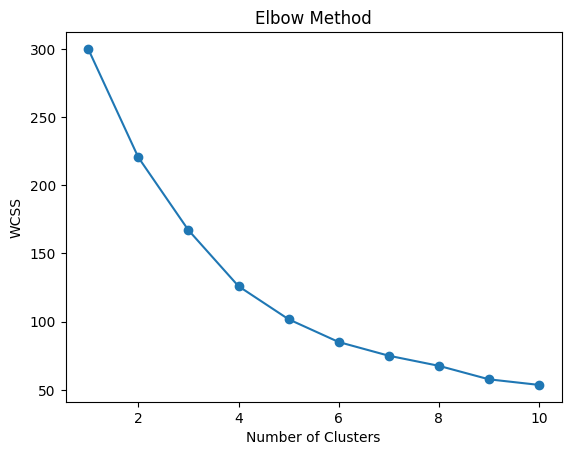

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


 Apply K-Means Clustering

In [6]:

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


Visualize Clusters (with PCA)

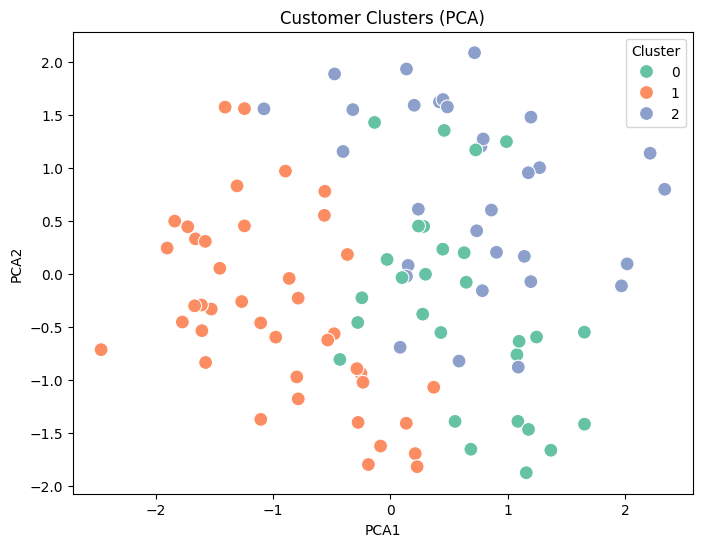

In [7]:
from sklearn.decomposition import PCA
import seaborn as sns


pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Clusters (PCA)')
plt.show()


Optional Visuals (Pairplot, Centroids)

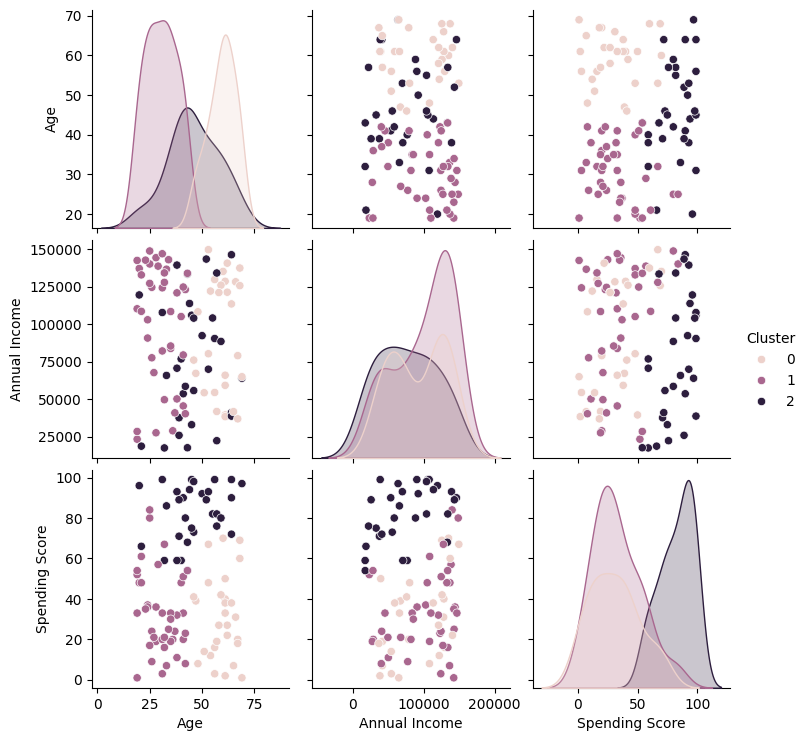

In [8]:

sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income', 'Spending Score'])
plt.show()


In [9]:
print(df.groupby('Cluster').mean())


         Customer ID        Age  Annual Income  Spending Score      PCA1  \
Cluster                                                                    
0          50.464286  59.321429   92416.678571       30.785714  0.613920   
1          53.926829  30.439024  100774.439024       32.926829 -0.951288   
2          46.000000  46.000000   77146.741935       82.548387  0.703646   

             PCA2  
Cluster            
0       -0.330591  
1       -0.356937  
2        0.770676  
